In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile, os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
%matplotlib inline 

In [2]:
#cane     - dog 
#elefante - elephant
#gallina  - chicken
#pecora   - sheep

In [3]:
!pip install -q kaggle

In [4]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radyafariez1","key":"f13601e80399a8767a3522b154c9628a"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!kaggle datasets download -d alessiocorrado99/animals10

 99% 578M/586M [00:04<00:00, 140MB/s]
100% 586M/586M [00:04<00:00, 137MB/s]


In [7]:
!mkdir animals
!unzip -qq animals10.zip -d animals
!ls animals

raw-img  translate.py


In [8]:
!ls animals/raw-img/

cane	 elefante  gallina  mucca   ragno
cavallo  farfalla  gatto    pecora  scoiattolo


In [9]:
animals = os.path.join('/content/animals/raw-img/')
print(os.listdir(animals))

['cane', 'gatto', 'gallina', 'ragno', 'pecora', 'farfalla', 'scoiattolo', 'cavallo', 'elefante', 'mucca']


In [10]:
ignore_animals = ['farfalla','cavallo','gatto','ragno','scoiattolo','mucca']

for x in ignore_animals:
  path = os.path.join(animals, x)
  shutil.rmtree(path)

In [11]:
list_animals = os.listdir(animals)
print(list_animals)


['cane', 'gallina', 'pecora', 'elefante']


In [12]:
from PIL import Image
total = 0

for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))

  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(5):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('#',img.size)
  print('<<<<<<<>>>>>>>')

print('\nTotal Amount:', total)

cane: 4863
# (300, 168)
# (246, 253)
# (227, 300)
# (300, 225)
# (300, 225)
<<<<<<<>>>>>>>
gallina: 3098
# (297, 300)
# (300, 201)
# (300, 286)
# (300, 225)
# (225, 300)
<<<<<<<>>>>>>>
pecora: 1820
# (300, 169)
# (640, 426)
# (225, 300)
# (300, 240)
# (300, 200)
<<<<<<<>>>>>>>
elefante: 1446
# (300, 300)
# (300, 300)
# (640, 426)
# (300, 169)
# (300, 202)
<<<<<<<>>>>>>>

Total Amount: 11227


<function matplotlib.pyplot.show(*args, **kw)>

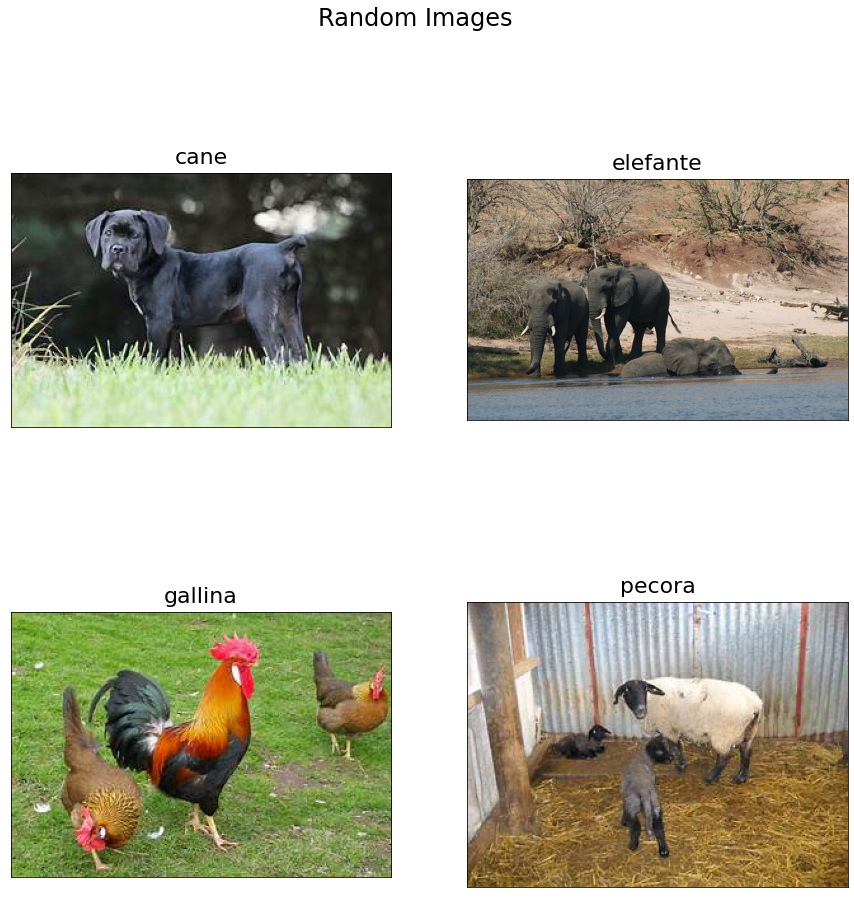

In [13]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Random Images", fontsize=24)
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      animals_selected = animals_sorted[animals_id] 
      animals_id += 1
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=22)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

In [14]:
#Augmentation Data & Train Test Split
training_data = ImageDataGenerator(
      rescale = 1./255,
      rotation_range = 35,
      width_shift_range = 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest',
      validation_split = 0.2
    )

In [15]:
batch_size = 32 #processing data dalam 1 epoch (mempengaruhi runtime)
data_train = training_data.flow_from_directory(
    animals,
    target_size= (150, 150),
    batch_size= batch_size,
    class_mode= 'categorical',
    subset= 'training')

data_val = training_data.flow_from_directory(
    animals, 
    target_size= (150, 150),
    batch_size= batch_size,
    class_mode= 'categorical',
    subset= 'validation')

Found 8983 images belonging to 4 classes.
Found 2244 images belonging to 4 classes.


In [16]:
#Pembentukan model sequential

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation = 'relu', input_shape = (150,150,3)),  #layer konvolusi ke-1
    tf.keras.layers.MaxPooling2D(2, 2),  

    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'), #layer konvolusi ke-2
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'), #layer konvolusi ke-3
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #layer konvolusi ke-4
    tf.keras.layers.MaxPooling2D(2,2), 

    tf.keras.layers.Flatten(),  #layer input untuk deep learning NN
    tf.keras.layers.Dropout(0.5),

    #tf.keras.layers.Dense(128, activation = 'relu'),  #hidden layer ke-1
    tf.keras.layers.Dense(128, activation = 'relu'),  #hidden layer ke-2
    tf.keras.layers.Dense(4, activation = 'softmax')  #layer output
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [17]:
#Compile model
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [18]:
#Callback opt
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    #if(logs.get('Accuracy')>=0.9 and logs.get('val_Accuracy')>=0.9):
    if logs.get('Accuracy') is not None and logs.get('Accuracy') > 0.90:
      self.model.stop_training = True
      print("\nAccuracy and val_Accuracy reached 90%")

callbacks = myCallback()

In [20]:
#train model NN
history = model.fit(
      data_train,
      steps_per_epoch = 35, #jumlah batch yang akan dieksekusi
      epochs = 150, 
      validation_data = data_val, #untuk tampilan akurasi
      validation_steps = 5, # jumlah batch yang akan dieksekusi pada setiap epoch
      verbose = 1,
      callbacks = [callbacks])

Epoch 1/150
35/35 [==============================] - 24s 674ms/step - loss: 1.2412 - accuracy: 0.4356 - val_loss: 1.1872 - val_accuracy: 0.4750
Epoch 2/150
35/35 [==============================] - 24s 694ms/step - loss: 1.2137 - accuracy: 0.4321 - val_loss: 1.2264 - val_accuracy: 0.4688
Epoch 3/150
35/35 [==============================] - 24s 674ms/step - loss: 1.1840 - accuracy: 0.4812 - val_loss: 1.1799 - val_accuracy: 0.4250
Epoch 4/150
35/35 [==============================] - 24s 675ms/step - loss: 1.1256 - accuracy: 0.5014 - val_loss: 1.0932 - val_accuracy: 0.5312
Epoch 5/150
35/35 [==============================] - 26s 738ms/step - loss: 1.1169 - accuracy: 0.5170 - val_loss: 1.1233 - val_accuracy: 0.5125
Epoch 6/150
35/35 [==============================] - 24s 677ms/step - loss: 1.1230 - accuracy: 0.5375 - val_loss: 1.1202 - val_accuracy: 0.5125
Epoch 7/150
35/35 [==============================] - 24s 675ms/step - loss: 1.0822 - accuracy: 0.5571 - val_loss: 1.1098 - val_accuracy:

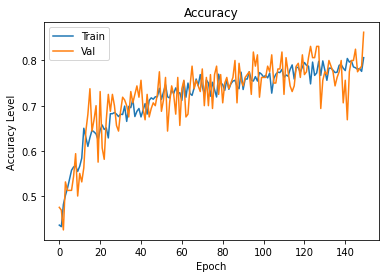

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy Level')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

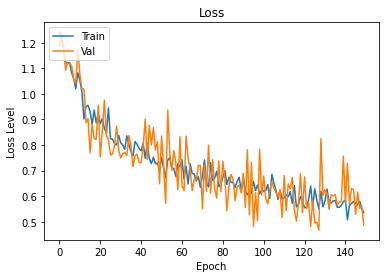

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss Level')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [25]:
# Melakukan konversi model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [27]:
!ls -la | grep 'model'